In [8]:
import os
import shutil
import pandas as pd
import numpy as np
from tqdm import tqdm

from utils import generate_imgs_for_training

# make directory 
dirname = 'img_data'
if os.path.exists(dirname): shutil.rmtree(dirname) # remove if exists
if not os.path.exists(dirname): os.makedirs(dirname)

pd.read_csv(f"../../datasets/processed/559-train.csv").head(3)

,time,glu_raw,glu,glu_d,glu_t,hr_raw,hr,hr_d,hr_t,iob_raw,iob,hour_raw,hour,basal_raw,bolus_raw,basal,bolus,done
0,2021-12-07 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.054167,-1.852595,0,0.0,0.65,0.0,-1.014677,-0.099243,0
1,2021-12-07 00:05:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.108287,-1.825830,0,0.0,0.65,0.0,-1.014677,-0.099243,0
2,2021-12-07 00:10:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.162271,-1.799133,0,0.0,0.65,0.0,-1.014677,-0.099243,0


In [23]:
# set participant id
df_all = pd.DataFrame()
df_all = pd.read_csv("data.csv")
for pid in ["559", "563", "570", "575", "588", "591"]:

    # read data
    df = pd.read_csv(f"../../datasets/processed/{pid}-train.csv")
    df[["iob_raw", "basal_raw", "bolus_raw"]] = df[["iob_raw", "basal_raw", "bolus_raw"]].apply(lambda col: col.map(lambda x: 0 if x < 0 else x))
    df = df.dropna(axis=0)

    # discretize basal and bolus
    bins_for_basal_bounds = np.linspace(-1, 5, 257) # 256 - upper bound is 5
    bins_for_bolus_bounds = np.linspace(-1, 25, 257) # 256 - upper bound is 25

    df['basal_binned'] = pd.cut(df['basal_raw'], bins=bins_for_basal_bounds, labels=False)#.astype(int)
    df['bolus_binned'] = pd.cut(df['bolus_raw'], bins=bins_for_bolus_bounds, labels=False)#.astype(int)

    # generation settings
    step_size = 10 # skip every n points
    plot_interval = 50 # n datapoints before current to show in graph

    # Generate and store plot images
    #for i in tqdm(range(plot_interval, len(df), step_size)): 
    #    df = generate_imgs_for_training(df, i, plot_interval, pid=pid, dirname=dirname)

    # Add df to df_all dataframe
    if df_all.empty: df_all = df
    else: df_all = pd.concat([df_all, df], ignore_index=True)


# save the dataframe
df_all.head()
#df_all.to_csv("data.csv")

,Unnamed: 0,time,glu_raw,glu,glu_d,glu_t,hr_raw,hr,hr_d,hr_t,...,bolus,done,basal_binned,bolus_binned,time_str,glu_url,hr_url,iob_url,basal_url,bolus_url
0,0.0,2021-12-07 13:20:00,206.0,0.557703,-0.581471,-1.257560,73.0,-0.038840,0.182794,-1.276998,...,-0.099243,0.0,49.0,1.0,13:20:00,./img_data/559_160_glu.png,./img_data/559_160_hr.png,./img_data/559_160_iob.png,./img_data/559_160_basal.png,./img_data/559_160_bolus.png
1,1.0,2021-12-07 13:25:00,196.0,0.415985,-1.467792,-1.171252,69.0,-0.292948,-0.364849,0.197282,...,-0.099243,0.0,49.0,1.0,13:25:00,NaN,NaN,NaN,NaN,NaN
2,2.0,2021-12-07 13:30:00,181.0,0.203408,-2.206392,-1.430175,69.0,-0.292948,0.000246,0.040640,...,-0.099243,0.0,49.0,1.0,13:30:00,NaN,NaN,NaN,NaN,NaN
3,3.0,2021-12-07 13:35:00,220.0,0.756108,5.770495,-0.345936,74.0,0.024687,0.456615,0.095925,...,-0.099243,0.0,49.0,1.0,13:35:00,NaN,NaN,NaN,NaN,NaN
4,4.0,2021-12-07 13:40:00,220.0,0.756108,0.009410,0.430833,74.0,0.024687,0.000246,0.169639,...,-0.099243,0.0,49.0,1.0,13:40:00,NaN,NaN,NaN,NaN,NaN


In [24]:
df_all[["iob_raw", "basal_raw", "bolus_raw", "basal_binned", "bolus_binned"]]

,iob_raw,basal_raw,bolus_raw,basal_binned,bolus_binned
0,8.311250,0.90,0.0,49.0,1.0
1,8.070943,0.90,0.0,49.0,1.0
2,7.828720,0.90,0.0,49.0,1.0
3,7.585124,0.90,0.0,49.0,1.0
4,7.340697,0.90,0.0,49.0,1.0
...,...,...,...,...,...
126754,6.550000,0.98,4.1,84.0,50.0
126755,6.546506,0.98,0.0,84.0,9.0
126756,6.536186,0.98,0.0,84.0,9.0
126757,6.519277,0.98,0.0,84.0,9.0


In [ ]:
# Remove NaNs and save the cleaned dataframe
df_all_clean = df_all.dropna(subset=["glu_raw", "glu_url"])
df_all_clean.to_csv("data_clean.csv")
print(len(df_all_clean))
df_all_clean[["iob_raw", "basal_raw", "bolus_raw", "basal_binned", "bolus_binned"]]

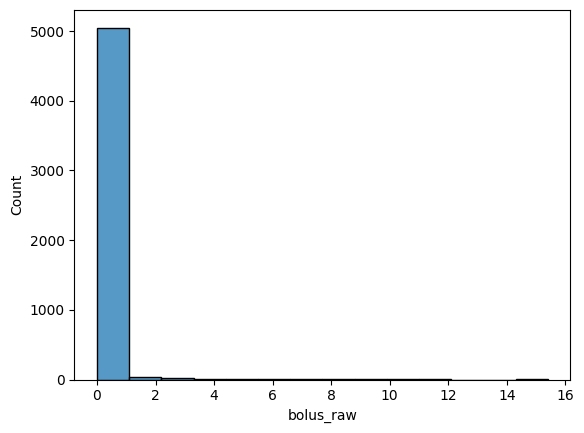

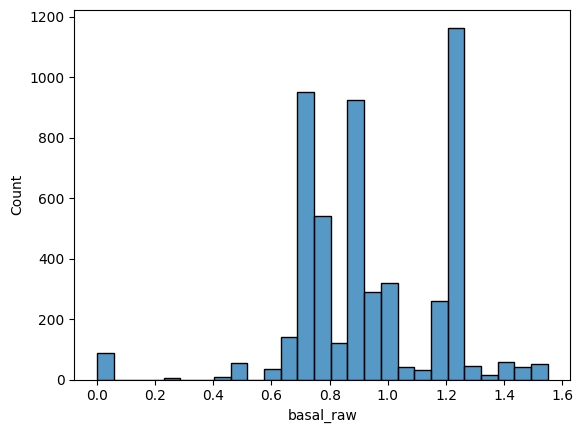

In [27]:
# viz
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

dffff = pd.read_csv("data_clean.csv")
sns.histplot(dffff["bolus_raw"])
plt.show()
sns.histplot(dffff["basal_raw"])
plt.show()